### Defocus detection through classification

#### Features selected:
The images losses it's edges due to defocus and so the features are selected as edges through sobel and laplacian operators


**Sobel Edge operator**
It is a edge detection operator based on gradient method i.e., the first order derivative method. Along x or along y or bi-directional. The edges are detected by convolving the kernel with actual image.
The sobel operator kernel used here is bi-directional

**Laplacian Edge operator**
It is also an edge detection operator based on gradient methos but it calculated the second dervative od the data . It internally calls the sobel operator for first derivative.

**Why Derivative?**
The edges can be deteced by finding the local maxima or minima of it's first derivative
The edges can be deteced by finding the zero-crossing of it's second derivative 



In [176]:
print('Sobel operator:\n',np.matrix([[1,0,-1],[2,0,-2],[1,0,-1]]))
print('Laplacian operator:\n',np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]]))

Sobel operator:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Laplacian operator:
 [[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2
import sklearn
import os

from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, roberts

C:\Users\harini\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


#### Dataset:
It is a image blur data from kaggle and it has 3 types of a same image
1. Sharp image 
2. Defocused image
3. Motion blurred image

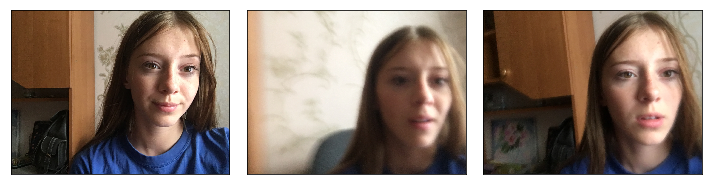

In [2]:
s_path ='sharp/'
df_path='defocused_blurred/'
mot_path ='motion_blurred/'

img_paths = ['sharp/89_IPHONE-6S_S.jpeg','defocused_blurred/89_IPHONE-6S_F.jpeg','motion_blurred/89_IPHONE-6S_M.jpeg']
 
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=plt.imread(path[i])
        plt.subplot(1, 3, i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

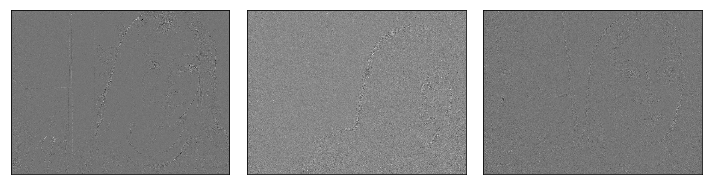

In [212]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = laplace(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

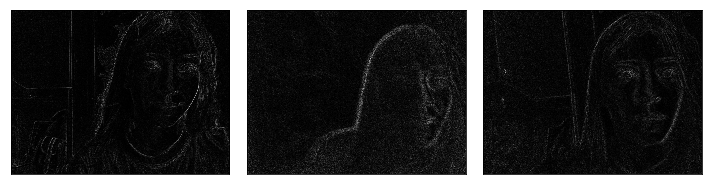

In [213]:
def show_images(path):
    plt.figure(figsize=(10,10))
    for i in range(len(path)):
        x=cv2.imread(path[i],0)
        l = sobel(x)
        plt.subplot(1, 3, i+1)
        plt.imshow(l,cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()
show_images(img_paths)

In [214]:
sharp_images = os.listdir(s_path)
defocused = os.listdir(df_path)
motion_blurred = os.listdir(mot_path)

In [7]:
def get_data(path,images):
    features=[]
    for img in images:
        feature=[]
        image_gray = cv2.imread(path+img,0)
        lap_feat = laplace(image_gray)
        sob_feat = sobel(image_gray)
        feature.extend([img,lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),sob_feat.mean(),sob_feat.var(),np.max(sob_feat)])
        
        features.append(feature)
    return features


### Feature Extraction:
The mean, variance,maximum of the edge detected feature matrix are take for each image appled on sobel and lapaclacian edge detection

In [ ]:
sharp_features = get_data(s_path,sharp_images)
defocused_features = get_data(df_path,defocused)
motion_blur_features = get_data(mot_path,motion_blurred)

In [3]:
sharp_df = pd.read_csv('sharp_features.csv')
def_df = pd.read_csv('defocused_features.csv')
motblur_df = pd.read_csv('motionblurred_features.csv')
sharp_df.head()
sharp_df.drop('Unnamed: 0',axis=1,inplace=True)
motblur_df.drop('Unnamed: 0',axis=1,inplace=True)
def_df.drop('Unnamed: 0',axis=1,inplace=True)


### Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

It has two types
1. HArd Margin - the data can be classified by a line or hyperplane but without error added to the algorithm
2. Soft margin -  the data can be classified by a line or hyperplane but with error added to the algorithm

If the data cannot be clssified by a line .. It maps the data to higher dimension where it can calssify using the plane/ hyperplane


In [ ]:
Hard margin - basic optimi

Parameters:
1. **Kernel** - It can have either linear or non-linear classifier based on the **kernel** we use...
    * 

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
images=pd.DataFrame()

images = images.append(sharp_df)
images = images.append(def_df)
all_features = np.array(images)
y_f = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((def_df.shape[0], ))), axis=0)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y_f,test_size=0.33,stratify=y_f)

svm_model = svm.SVC(C=100,kernel='linear')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print(accuracy_score(y_valid,pred))
print(confusion_matrix(y_valid,pred))
print(f1_score(y_valid,pred))

0.9567099567099567
[[110   6]
 [  4 111]]
0.9568965517241379


In [31]:
def get_data(path,images):
    features=[]
    for img in images:
        feature=[]
        image_gray = cv2.imread(path+img,0)
        image_gray= image_gray/255
        print(np.max(image_gray))
        lap_feat = laplace(image_gray)
        sob_feat = sobel(image_gray)
        rob_feat = roberts(image_gray)
        feature.extend([lap_feat.mean(),lap_feat.var(),np.amax(lap_feat),sob_feat.mean(),sob_feat.var(),np.max(sob_feat),
                       rob_feat.mean(),rob_feat.var(),np.max(rob_feat)])
        
        features.append(feature)
    return features


In [6]:
cell_images = os.listdir('spec_ins/crop_MNT/')
path ='spec_ins/crop_MNT/'

In [32]:
cell_features=get_data_norm(path,cell_images)

0.5019607843137255
0.5098039215686274
0.5098039215686274
0.5058823529411764
0.5098039215686274
0.5215686274509804
0.5215686274509804
0.5215686274509804
0.5137254901960784


In [28]:
cell_features = pd.DataFrame(cell_features)

In [12]:
cell_features.drop(0,axis=1,inplace=True)
cell_features

,1,2,3,4,5,6
0,-5.304537e-06,0.000068,0.031373,0.004541,0.000006,0.015346
1,-3.788955e-07,0.000066,0.035294,0.004785,0.000008,0.020612
2,-5.493985e-06,0.000069,0.031373,0.005294,0.000014,0.022866
3,1.894478e-07,0.000069,0.035294,0.005711,0.000025,0.037371
4,4.736194e-06,0.000067,0.031373,0.005636,0.000016,0.022119
5,-9.661836e-06,0.000069,0.031373,0.005903,0.000011,0.021164
6,-1.326134e-05,0.000068,0.031373,0.005681,0.000009,0.018078
7,-1.269300e-05,0.000068,0.031373,0.005093,0.000008,0.015839
8,-8.335701e-06,0.000068,0.031373,0.004144,0.000005,0.014836


In [33]:
cell_features = pd.DataFrame(cell_features)
cell_features

,0,1,2,3,4,5,6,7,8
0,-5.304537e-06,0.000068,0.031373,0.004541,0.000006,0.015346,0.003868,0.000006,0.013865
1,-3.788955e-07,0.000066,0.035294,0.004785,0.000008,0.020612,0.004016,0.000006,0.016169
2,-5.493985e-06,0.000069,0.031373,0.005294,0.000014,0.022866,0.004406,0.000009,0.020188
3,1.894478e-07,0.000069,0.035294,0.005711,0.000025,0.037371,0.004709,0.000014,0.027868
4,4.736194e-06,0.000067,0.031373,0.005636,0.000016,0.022119,0.004596,0.000010,0.018602
5,-9.661836e-06,0.000069,0.031373,0.005903,0.000011,0.021164,0.004727,0.000008,0.018602
6,-1.326134e-05,0.000068,0.031373,0.005681,0.000009,0.018078,0.004574,0.000007,0.017538
7,-1.269300e-05,0.000068,0.031373,0.005093,0.000008,0.015839,0.004208,0.000006,0.014139
8,-8.335701e-06,0.000068,0.031373,0.004144,0.000005,0.014836,0.003625,0.000005,0.013865


In [16]:
max(cell_features[5])

2.518776075157178e-05

In [13]:
pred =svm_model.predict(np.array(cell_features))

In [14]:
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
svm_model = svm.SVC(C=100,kernel='rbf')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print(accuracy_score(y_valid,pred))
print(confusion_matrix(y_valid,pred))
print(f1_score(y_valid,pred))

0.9696969696969697
[[112   4]
 [  3 112]]
0.9696969696969697


C:\Users\harini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
all_image = pd.DataFrame()
all_image = all_image.append(sharp_df)
all_image = all_image.append(def_df)
all_image = all_image.append(motblur_df)

y = np.concatenate((np.ones((sharp_df.shape[0], )), np.zeros((motblur_df.shape[0]+def_df.shape[0], ))), axis=0)
all_features = np.array(all_image)

x_train,x_valid,y_train,y_valid = train_test_split(all_features,y,test_size=0.33,stratify=y)

svm_model = svm.SVC(C=100,kernel='linear')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print(accuracy_score(y_valid,pred))
print(confusion_matrix(y_valid,pred))
print(f1_score(y_valid,pred))

0.861671469740634
[[206  26]
 [ 22  93]]
0.7948717948717948


In [19]:
svm_model = svm.SVC(C=100,kernel='rbf')
svm_model.fit(x_train,y_train)
pred =svm_model.predict(x_valid)
print(accuracy_score(y_valid,pred))
print(confusion_matrix(y_valid,pred))
print(f1_score(y_valid,pred))

0.8674351585014409
[[206  26]
 [ 20  95]]
0.8050847457627119


C:\Users\harini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
